### Mount Google Drive for colab

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import classification_report

### Define init values

In [10]:
records = 549                  # total records
num_leads = 12                 # 12 leads out of given 15 to be choosen
sampling_freq = 1000           # 1000 Hz
downsampled_to = 250           # signal is downsampled to
images_required = 1500         # from each record
each_lead_time = 2.5           # 2.5 seconds
mov_avg_filt = 50              # mov avg filter
display_factor = 1.5           # to scale the image
line_width = 1.5               # thicknes of line in plot
images_per_record = 4000       # Number of images required from each record, e.g. input 4 reads 0:2500, 2500:5000, 5000:7500, 7500:10000 from each record

### Define a function & path for offline use and import data from 549 records

In [11]:
def offline():
    dataset_path = 'D:\MTP\ptbdb/'
    data = open('D:\MTP\ptbdb\RECORDS.txt', 'r')


    # input the data from the ptb dataset and store it in as npy files
    from read_ptb_data_new import read_data

    fields = read_data(data=data, dataset_path=dataset_path, 
                        M=mov_avg_filt, each_lead_time=each_lead_time,
                        num_leads=num_leads, 
                        images_per_record=images_per_record,
                        scale = sampling_freq//downsampled_to)               # call fn to read PTB db
    sampling_freq = fields['fs']
    # load the saved data
    new_path = '.\data_folder'

    train_data = np.load(new_path+'/'+'train_data1.npy')
    train_label = np.load(new_path+'/'+'train_label1.npy')
    for i in range(2,18):
        train_data_temp = np.load(new_path+'/'+f'train_data{i}.npy')
        train_label_temp = np.load(new_path+'/'+f'train_label{i}.npy')
        train_data = np.append(train_data, train_data_temp, axis=0)
        train_label = np.append(train_label, train_label_temp, axis=0)
        
    test_data = np.load(new_path+'/'+'test_data1.npy')
    test_label = np.load(new_path+'/'+'test_label1.npy')
    for i in range(2,6):
        test_data_temp = np.load(new_path+'/'+f'test_data{i}.npy')
        test_label_temp = np.load(new_path+'/'+f'test_label{i}.npy')
        test_data = np.append(test_data, test_data_temp, axis=0)
        test_label = np.append(test_label, test_label_temp, axis=0)
    return train_data, train_label, test_data, test_label

### Define path for Kaggle/Google notebook

In [12]:
def online():
    # load the saved data
    new_path = '/content/drive/My Drive/ECG'
    
    train_data = np.load(new_path+'/'+'train_data1.npy')
    train_label = np.load(new_path+'/'+'train_label1.npy')
    for i in range(2,18):
        train_data_temp = np.load(new_path+'/'+f'train_data{i}.npy')
        train_label_temp = np.load(new_path+'/'+f'train_label{i}.npy')
        train_data = np.append(train_data, train_data_temp, axis=0)
        train_label = np.append(train_label, train_label_temp, axis=0)
        
    test_data = np.load(new_path+'/'+'test_data1.npy')
    test_label = np.load(new_path+'/'+'test_label1.npy')
    for i in range(2,6):
        test_data_temp = np.load(new_path+'/'+f'test_data{i}.npy')
        test_label_temp = np.load(new_path+'/'+f'test_label{i}.npy')
        test_data = np.append(test_data, test_data_temp, axis=0)
        test_label = np.append(test_label, test_label_temp, axis=0)
    return train_data, train_label, test_data, test_label

### Load the data and label and print their size

In [13]:
# train_data, train_label, test_data, test_label = offline()
train_data, train_label, test_data, test_label = online()

print(np.shape(train_data))
print(np.shape(train_label))
print(np.shape(test_data))
print(np.shape(test_label))

count1, count2 = 0, 0
for i in train_label:
    if i:
        count1 += 1
    else:
        count2 += 1
print(f"Total number of unique combinations of diagnosis(TRAINING): {len(train_label)}")        
print(f"MI Records: {count1}")
print(f"HC Records: {count2}")

count1, count2 = 0, 0
for i in test_label:
    if i:
        count1 += 1
    else:
        count2 += 1
print(f"Total number of unique combinations of diagnosis(TESTING): {len(test_label)}")        
print(f"MI Records: {count1}")
print(f"HC Records: {count2}")

(7264, 625, 12)
(7264,)
(1927, 625, 12)
(1927,)
Total number of unique combinations of diagnosis(TRAINING): 7264
MI Records: 5318
HC Records: 1946
Total number of unique combinations of diagnosis(TESTING): 1927
MI Records: 1372
HC Records: 555


### Create ECG images from the data and then read images (RGB format)

In [14]:
# to create ecg records from ptb db
from create_images_and_read import create
images_required = 30
train_path = './train/'

train_data_read, train_label_read = create(train_data, train_label, 
                           images_required=images_required, path=train_path, 
                           display_factor=display_factor, 
                           sampling_freq=downsampled_to, #sampling_freq, 
                           line_color = (0,0,0),
                            line_width=1.5,
                            w = 2538, h = 912) # call fn to create ECG graphs

test_path = './test/'
test_data_read, test_label_read = create(test_data, test_label, 
                           images_required=images_required, path=test_path, 
                           display_factor=display_factor, 
                           sampling_freq=downsampled_to, #sampling_freq, 
                           line_color = (0,0,0),
                            line_width=1.5,
                            w = 2538, h = 912) # call fn to create ECG graphs

ECG Graph Created
ECG Graph Created


### Print the size of read RGB images

In [15]:
# images read in rgb format and stored in data_read
print(np.shape(train_data_read))
print(np.shape(train_label_read))
print(np.shape(test_data_read))
print(np.shape(test_label_read))

(60, 912, 2538, 3)
(60,)
(60, 912, 2538, 3)
(60,)


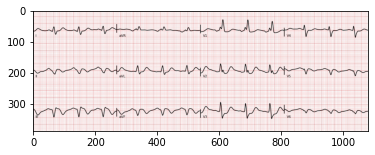

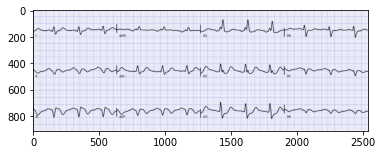

In [16]:
plt.imshow(mpimg.imread('./train/ptbdb/Myocardial infarction/MI_ecg_1.jpg'))
plt.show()
plt.imshow(train_data_read[0])
plt.show()

### Convert RGB images to plots (Retrieve the data back)

In [17]:
# to convert read images to plots ie having 1D data
from image_to_plot import get_12_ecgs, graph_to_plot, moving_avg_filt

# parameters
image_intensity_threshold = 125
crop_pixels_out = 2
moving_avg_value = 3

In [18]:
# call above three functions for train dataset
train_data_recovered = []
for i in range(len(train_data_read)):
    ecg_images_extracted = get_12_ecgs(train_data_read[i], 
                                       thresh=image_intensity_threshold, 
                                       crop=crop_pixels_out)
    
    raw_data = graph_to_plot(ecg_images_extracted)
    
    train_data_recovered += [moving_avg_filt(raw_data, M=moving_avg_value)]
    
train_data_recovered = np.array(train_data_recovered)
print("ECG images converted to plot data...Done")
print(np.shape(train_data_recovered))

# call above three functions for test dataset
test_data_recovered = []
for i in range(len(test_data_read)):
    ecg_images_extracted = get_12_ecgs(test_data_read[i], 
                                       thresh=image_intensity_threshold, 
                                       crop=crop_pixels_out)
    
    raw_data = graph_to_plot(ecg_images_extracted)
    
    test_data_recovered += [moving_avg_filt(raw_data, M=moving_avg_value)]
    
test_data_recovered = np.array(test_data_recovered)
print("ECG images converted to plot data...Done")
print(np.shape(test_data_recovered))

ECG images converted to plot data...Done
(60, 12, 625)
ECG images converted to plot data...Done
(60, 12, 625)


### Convert the read data to correct format and normalize by MinMaxScaler

In [19]:
# read recovered data and convert it to proper format for signals
train_data_recovered = np.transpose(train_data_recovered, axes=(0, 2, 1))
new_sampling_freq = int(np.shape(train_data_recovered)[1]/(each_lead_time))
# normalize the signal
for j in range(len(train_data_recovered)):
    for k in range(num_leads):        
        train_data[j,:,k] = train_data[j,:,k]/(max(train_data[j,:,k])-min(train_data[j,:,k]))
        train_data_recovered[j,:,k] = train_data_recovered[j,:,k]/(max(train_data_recovered[j,:,k])-min(train_data_recovered[j,:,k]))
        
# read recovered data and convert it to proper format for signals
test_data_recovered = np.transpose(test_data_recovered, axes=(0, 2, 1))
new_sampling_freq = int(np.shape(test_data_recovered)[1]/(each_lead_time))
# normalize the signal
for j in range(len(test_data_recovered)):
    for k in range(num_leads):        
        test_data[j,:,k] = test_data[j,:,k]/(max(test_data[j,:,k])-min(test_data[j,:,k]))
        test_data_recovered[j,:,k] = test_data_recovered[j,:,k]/(max(test_data_recovered[j,:,k])-min(test_data_recovered[j,:,k]))

### Show the shape of PTB data fed and data retrieved back

In [20]:
print(np.shape(train_data))                          # data input
print(np.shape(train_data_recovered))                # data recovered
print(new_sampling_freq)                       # check the sampling freq is matching

print(np.shape(test_data))                          # data input
print(np.shape(test_data_recovered))                # data recovered
print(new_sampling_freq)                       # check the sampling freq is matching

(7264, 625, 12)
(60, 625, 12)
250
(1927, 625, 12)
(60, 625, 12)
250


### Compare the plots of ORIGINAL & RECOVERED data

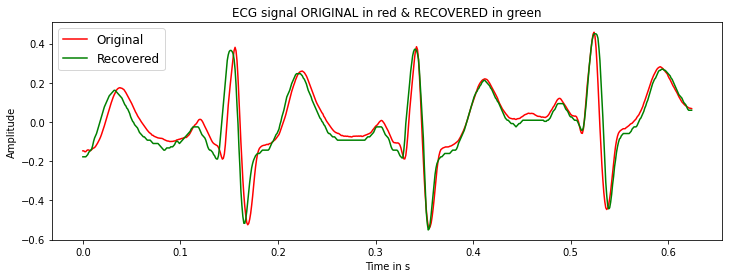

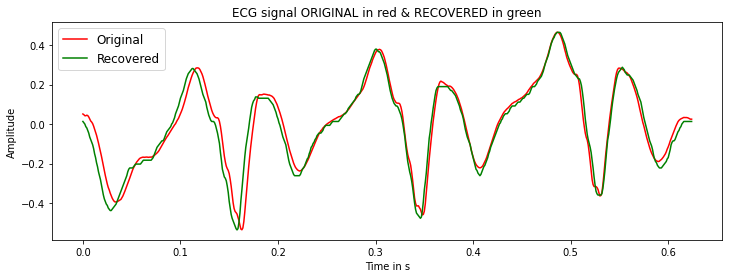

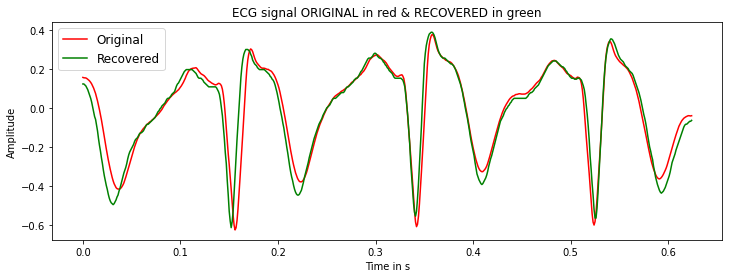

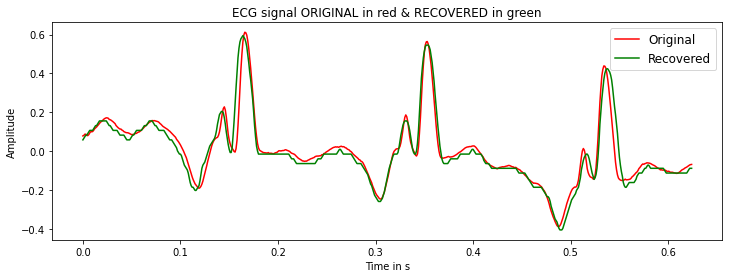

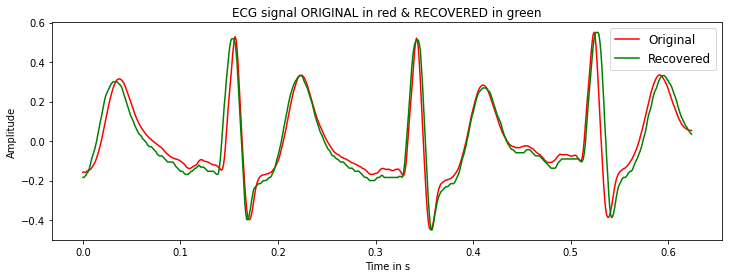

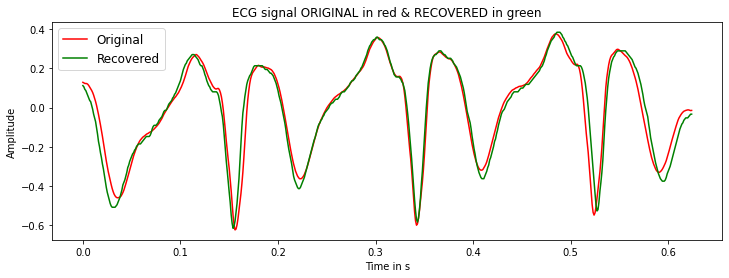

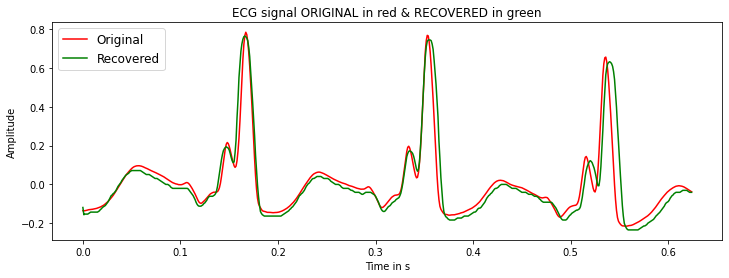

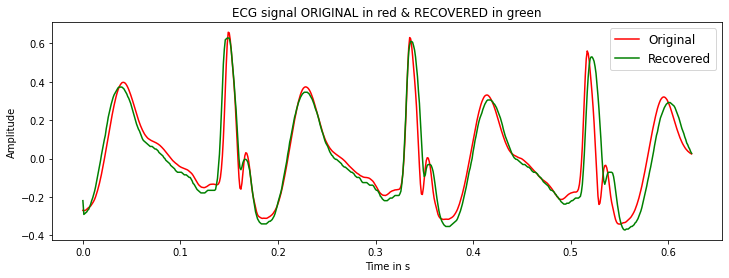

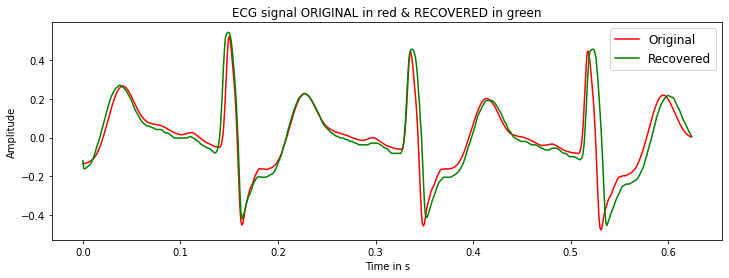

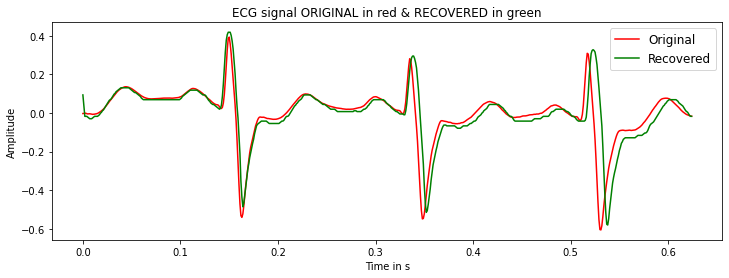

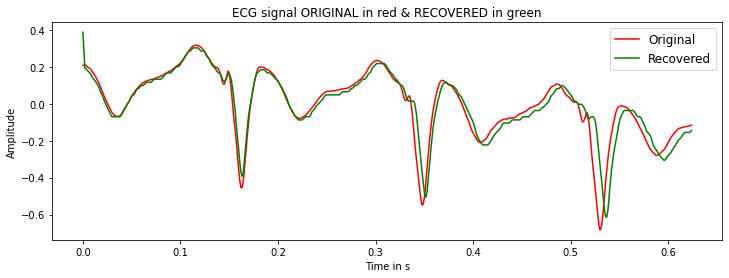

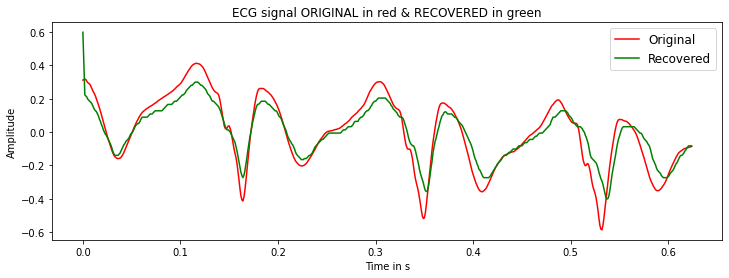

In [21]:
#%% Plot the graph of all 12 ECG signals of jth patient record number      
j = 0
# FOR TRAINING PART
for i in range(num_leads):
    t = np.arange(0, (len(train_data[j])/sampling_freq), (1/ sampling_freq))
    plt.figure(figsize=(12,4))
    plt.title("ECG signal ORIGINAL in red & RECOVERED in green")
    plt.plot(t, train_data[j,:,i], c='red', label='Original')
    plt.plot(t, train_data_recovered[j,:,i], c='green', label='Recovered')    
    plt.legend(loc='best', fontsize='large')
    plt.xlabel("Time in s")
    plt.ylabel("Amplitude")
    plt.show()

# # FOR TESTING PART    
# for i in range(num_leads):
#     t = np.arange(0, (len(test_data[j])/sampling_freq), (1/ sampling_freq))
#     plt.figure(figsize=(12,4))
#     plt.title("ECG signal ORIGINAL in red & RECOVERED in green")
#     plt.plot(t, test_data[j,:,i], c='red', label='Original')
#     plt.plot(t, test_data_recovered[j,:,i], c='green', label='Recovered')    
#     plt.legend(loc='best', fontsize='large')
#     plt.xlabel("Time in s")
#     plt.ylabel("Amplitude")
#     plt.show()

### Calculate Mean Square Error and Absolute Sum Error

In [22]:
# Error finding for ith record
i = 0
MSE = [0 for i in range(num_leads)]
ASE = [0 for i in range(num_leads)]

for k in range(num_leads):
    for j in range(len(train_data[0])):
        MSE[k] += (train_data_recovered[i,j,k] - train_data[i,j,k])**2
        ASE[k] += abs(train_data_recovered[i,j,k] - train_data[i,j,k])
    MSE[k] = (MSE[k]**0.5)/len(train_data[0])
    ASE[k] = ASE[k]/len(train_data[0])
# print("MSE:", MSE)
# print("ASE:", ASE)

print("MSE:", np.mean(MSE))
print("ASE:", np.mean(ASE))


# # FOR TESTING DATASET
# MSE = [0 for i in range(num_leads)]
# ASE = [0 for i in range(num_leads)]

# for k in range(num_leads):
#     for j in range(len(test_data[0])):
#         MSE[k] += (test_data_recovered[i,j,k] - test_data[i,j,k])**2
#         ASE[k] += abs(test_data_recovered[i,j,k] - test_data[i,j,k])
#     MSE[k] = (MSE[k]**0.5)/len(test_data[0])
#     ASE[k] = ASE[k]/len(test_data[0])
# # print("MSE:", MSE)
# # print("ASE:", ASE)

# print("MSE:", np.mean(MSE))
# print("ASE:", np.mean(ASE))

MSE: 0.0030450195615157223
ASE: 0.04514055158111307


### Calculate Wavelet Coeff

In [23]:
# wavelet based distortion measurement
import pywt
from biorth_wavelet import custom_wavelet
dec_levels = 6         # decomposition levels
wave = custom_wavelet()

records = len(train_data_recovered)
coeff_original = []
coeff_recovered = []

for patient in range(len(train_data_recovered)):
    coeff_original += [pywt.wavedec(train_data[patient], 
                           wavelet = wave, 
                           mode = 'zero', 
                           level = dec_levels, 
                           axis = 0)]
    
    coeff_recovered += [pywt.wavedec(train_data_recovered[patient], 
                           wavelet = wave, 
                           mode = 'zero', 
                           level = dec_levels, 
                           axis = 0)]

### Calculate WPRD

In [24]:
# WPRD calculate
# Error finding for ith record
i = 0
WPRD = []
for j in range(dec_levels+1):
    numer = 0
    denom = 0
    for k in range(len(coeff_original[i][j])):
        numer += (coeff_original[i][j][k]-coeff_recovered[i][j][k])**2
        denom += (coeff_original[i][j][k])**2
    WPRD.append((numer/denom)**0.5)

# Print WPRD
print("WPRD: (6+1 levels along rows as cA6 cD6 cD5 cD4 cD3 cD2 cD1)*(12 leads along columns)")
for x in WPRD:
    for y in x:
        print("%.3f" % y, end=',   ')
    print()

WPRD: (6+1 levels along rows as cA6 cD6 cD5 cD4 cD3 cD2 cD1)*(12 leads along columns)
0.431,   0.216,   0.392,   0.161,   0.423,   0.279,   0.270,   0.376,   0.400,   0.453,   0.204,   0.308,   
0.235,   0.304,   0.337,   0.306,   0.241,   0.272,   0.371,   0.292,   0.364,   0.488,   0.433,   0.451,   
0.625,   0.396,   0.588,   0.499,   0.561,   0.435,   0.627,   0.386,   0.567,   0.725,   0.521,   0.513,   
0.798,   0.605,   0.864,   0.572,   0.786,   0.793,   0.805,   0.593,   0.708,   0.903,   0.657,   0.659,   
1.170,   1.080,   0.835,   0.793,   0.924,   1.024,   1.206,   0.733,   1.101,   1.257,   0.884,   0.966,   
1.040,   1.615,   1.269,   1.265,   1.151,   1.319,   1.158,   0.944,   1.353,   1.333,   0.997,   1.115,   
0.657,   1.428,   0.707,   0.860,   0.580,   0.718,   0.689,   0.508,   0.783,   2.714,   0.910,   1.046,   


### Split the Data into Training & Validation split

In [25]:
train_X, val_X, train_y, val_y = train_test_split(train_data, train_label, test_size = 0.2, shuffle=True) 
print(f"Training split: {len(train_y)}")
print(f"Validation split: {len(val_y)}")

Training split: 5811
Validation split: 1453


### Define a DNN for 1D Data Convolution

In [69]:
def FCN(input_shape = (500,12), output_shape = 1):
    
    inputlayer = keras.layers.Input(shape=input_shape) 

    # Block 1
    conv1 = keras.layers.Conv1D(filters=128, kernel_size=8,input_shape=(5000,12), padding='same')(inputlayer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation(activation='relu')(conv1)

    # Block 2
    conv2 = keras.layers.Conv1D(filters=256, kernel_size=5, padding='same')(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation('relu')(conv2)

    # Block 3
    conv3 = keras.layers.Conv1D(128, kernel_size=3,padding='same')(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation('relu')(conv3)

    # Final
    gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)
    outputlayer = keras.layers.Dense(output_shape, activation='sigmoid')(gap_layer)
    model = keras.Model(inputs=inputlayer, outputs=outputlayer)
    
    # compile section
    model.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001), 
              metrics = [tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
                        tf.keras.metrics.Recall(name='Recall'),
                        tf.keras.metrics.Precision(name='Precision'), 
                        tf.keras.metrics.AUC(name="AUC", multi_label=True)]
             )
    return model

### Create & compile the Model

In [70]:
model = FCN(input_shape=np.shape(train_X[0]), output_shape=1)
model.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 625, 12)]         0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 625, 128)          12416     
_________________________________________________________________
batch_normalization_33 (Batc (None, 625, 128)          512       
_________________________________________________________________
activation_33 (Activation)   (None, 625, 128)          0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 625, 256)          164096    
_________________________________________________________________
batch_normalization_34 (Batc (None, 625, 256)          1024      
_________________________________________________________________
activation_34 (Activation)   (None, 625, 256)        

### Train the Model

In [71]:
batch_size = 32

parameter = 'val_Accuracy'      # 'val_AUC' loss,Accuracy,Recall,Precision,AUC,val_loss,val_Accuracy,val_Recall,val_Precision,val_AUC,lr

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor=parameter, factor=0.1, 
                                                 patience=1, verbose=1, mode='max',
                                                 min_delta=0.0001)

early_stop = tf.keras.callbacks.EarlyStopping(monitor=parameter, mode='max', verbose=1, patience=2)

model.fit(x = train_X, y = train_y, 
          epochs = 100, validation_data = [val_X, val_y],
          callbacks = [reduce_lr,early_stop],
          batch_size = batch_size)

Epoch 1/100
182/182 [==============================] - 4s 22ms/step - loss: 0.4171 - Accuracy: 0.9060 - Recall: 0.9195 - Precision: 0.9504 - AUC: 0.9619 - val_loss: 0.0000e+00 - val_Accuracy: 0.0000e+00 - val_Recall: 0.0000e+00 - val_Precision: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 2/100
181/182 [============================>.] - ETA: 0s - loss: 0.2627 - Accuracy: 0.9330 - Recall: 0.9492 - Precision: 0.9587 - AUC: 0.9819
Epoch 00002: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
182/182 [==============================] - 4s 21ms/step - loss: 0.2624 - Accuracy: 0.9332 - Recall: 0.9494 - Precision: 0.9589 - AUC: 0.9820 - val_loss: 0.0000e+00 - val_Accuracy: 0.0000e+00 - val_Recall: 0.0000e+00 - val_Precision: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 3/100
181/182 [============================>.] - ETA: 0s - loss: 0.2314 - Accuracy: 0.9361 - Recall: 0.9521 - Precision: 0.9602 - AUC: 0.9842
Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.


### Evaluate the Model

In [72]:
model.evaluate(test_data, test_label)

61/61 [==============================] - 0s 8ms/step - loss: 0.3589 - Accuracy: 0.8972 - Recall: 0.9359 - Precision: 0.9211 - AUC: 0.9045


[0.35886040329933167,
 0.8972496390342712,
 0.9358600378036499,
 0.9210903644561768,
 0.9044749736785889]

# COMPLETED UPTO THIS POINT

### K Fold CV

In [30]:
from sklearn.model_selection import KFold

def build_train(train_X, train_y, test_X, test_y, folds = 5, batch_size = 32, iteration = 30):
    
    models = []
    evaluation = []

    kfold = KFold(folds, shuffle = True)
    for fold, (train_ind, val_ind) in enumerate(kfold.split(train_X)):
        print('\n')
        print('-'*50)
        print(f'Training fold {fold + 1}')
        model = FCN(input_shape=np.shape(train_X[0]), output_shape=1)
        
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor=parameter, factor=0.1, 
                                                 patience=1, verbose=1, mode='max',
                                                 min_delta=0.0001)

        early_stop = tf.keras.callbacks.EarlyStopping(monitor=parameter, mode='max', verbose=1, patience=2)
                
        model.fit(x = train_X[train_ind], y = train_y[train_ind], 
                  epochs = iteration, validation_data=(train_X[val_ind], train_y[val_ind]),
                  callbacks = [reduce_lr,early_stop],
                  batch_size = batch_size,
                  verbose=2)
        evaluation.append(model.evaluate(test_X, test_y))
        models.append(model)
    return evaluation, models        

In [32]:
FOLDS = 5
evaluation, models = build_train(train_X, train_y, val_X, val_y, folds=FOLDS)
evaluation = np.array(evaluation)



--------------------------------------------------
Training fold 1
Epoch 1/30
146/146 - 4s - loss: 0.1276 - Accuracy: 0.9535 - Recall: 0.9683 - Precision: 0.9683 - AUC: 0.9904 - val_loss: 0.6244 - val_Accuracy: 0.7248 - val_Recall: 1.0000 - val_Precision: 0.7239 - val_AUC: 0.9627
Epoch 2/30
146/146 - 3s - loss: 0.0442 - Accuracy: 0.9895 - Recall: 0.9935 - Precision: 0.9921 - AUC: 0.9992 - val_loss: 0.2012 - val_Accuracy: 0.9166 - val_Recall: 1.0000 - val_Precision: 0.8964 - val_AUC: 0.9962
Epoch 3/30
146/146 - 3s - loss: 0.0302 - Accuracy: 0.9938 - Recall: 0.9956 - Precision: 0.9959 - AUC: 0.9996 - val_loss: 0.0808 - val_Accuracy: 0.9630 - val_Recall: 1.0000 - val_Precision: 0.9512 - val_AUC: 0.9999
Epoch 4/30

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
146/146 - 3s - loss: 0.0183 - Accuracy: 0.9961 - Recall: 0.9974 - Precision: 0.9974 - AUC: 0.9998 - val_loss: 0.0203 - val_Accuracy: 0.9923 - val_Recall: 0.9893 - val_Precision: 1.0000 - val_AUC: 

### Result of 5 fold Cross Validation

In [33]:
print(f"Results: \nAvg Accuracy: {np.mean(evaluation[:,1])}")
print(f"Avg Recall: {np.mean(evaluation[:,2])}")
print(f"Avg Precision: {np.mean(evaluation[:,3])}")
print(f"Avg AUC: {np.mean(evaluation[:,4])}")

Results: 
Avg Accuracy: 0.9995870590209961
Avg Recall: 0.9998130798339844
Avg Precision: 0.9996268630027771
Avg AUC: 1.000000011920929


### Make Test Predictions from 5 model average

In [34]:
test_pred = []
for model in models:
    test_pred.append(model.predict(test_data))

test_pred_avg = np.mean(test_pred, axis=0)
for i in range(len(test_pred_avg)):
    if test_pred_avg[i] < 0.5:
        test_pred_avg[i] = 0
    else:
        test_pred_avg[i] = 1

### Analyze the results using Confusion Matrix

Report & Confusion Matrix
              precision    recall  f1-score   support

          HC       0.79      0.81      0.80       555
          MI       0.92      0.91      0.92      1372

    accuracy                           0.88      1927
   macro avg       0.86      0.86      0.86      1927
weighted avg       0.89      0.88      0.89      1927



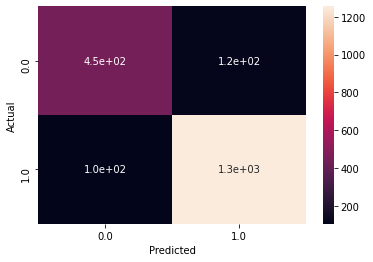

In [35]:
# function to create report and confusion matrix

def report_n_conf_mat(y_pred, y_test, file_name='Report.csv'):
    target_names = ['HC','MI']
    print(classification_report(y_test, y_pred, target_names=target_names))
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    report = pd.DataFrame(report).transpose()
    report.to_csv(file_name)
    
    data = {'y_Actual':    y_pred,
            'y_Predicted': y_test}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sn.heatmap(confusion_matrix, annot=True)
    plt.show()

print("Report & Confusion Matrix")
report_n_conf_mat(test_pred_avg[:,0], test_label, file_name='./'+'Classification Report.csv')

In [37]:
import pywt
def custom_wavelet():
    # create a 9/7 biorthogonal wavelet filter  ,,,,,,values from wikipedia table
    dec_lo = [0.026748757411, -0.016864118443, -0.078223266529, 0.266864118443, 0.602949018236, 0.266864118443, -0.078223266529, -0.016864118443, 0.026748757411]
    dec_hi = [0, 0.091271763114, -0.057543526229, -0.591271763114, 1.11508705, -0.591271763114, -0.057543526229, 0.091271763114, 0]
    rec_lo = [0, -0.091271763114, -0.057543526229, 0.591271763114, 1.11508705, 0.591271763114, -0.057543526229, -0.091271763114, 0]
    rec_hi = [0.026748757411, 0.016864118443, -0.078223266529, -0.266864118443, 0.602949018236, -0.266864118443, -0.078223266529, 0.016864118443, 0.026748757411]
    filter_bank = [dec_lo, dec_hi, rec_lo, rec_hi]
    myWavelet = pywt.Wavelet(name="my97biorthoWavelet", filter_bank=filter_bank)

    class myFilterBank(object):
        @property
        def filter_bank(self):
            dec_lo = [0.026748757411, -0.016864118443, -0.078223266529, 0.266864118443, 0.602949018236, 0.266864118443, -0.078223266529, -0.016864118443, 0.026748757411]
            dec_hi = [0, 0.091271763114, -0.057543526229, -0.591271763114, 1.11508705, -0.591271763114, -0.057543526229, 0.091271763114, 0]
            rec_lo = [0, -0.091271763114, -0.057543526229, 0.591271763114, 1.11508705, 0.591271763114, -0.057543526229, -0.091271763114, 0]
            rec_hi = [0.026748757411, 0.016864118443, -0.078223266529, -0.266864118443, 0.602949018236, -0.266864118443, -0.078223266529, 0.016864118443, 0.026748757411]
            return [dec_lo, dec_hi, rec_lo, rec_hi]

    filter_bank = myFilterBank()
    mymotherWavelet = pywt.Wavelet(name="my97biorthoWavelet", filter_bank=filter_bank)
    return mymotherWavelet

In [42]:
dec_levels = 6         # decomposition levels
wave = custom_wavelet()
signals = np.concatenate((train_data, test_data))
label = np.concatenate((train_label, test_label))
records = len(signals)
coeff = []

for patient in range(records):
    coeff += [pywt.wavedec(signals[patient], 
                           wavelet = wave, 
                           mode = 'zero', 
                           level = dec_levels, 
                           axis = 0)]
print(np.shape(signals))                        
print(np.shape(label))

(9191, 625, 12)
(9191,)


In [43]:
def find_Z_feature(coeff, max_dec_levels=4, max_eig_values=6, num_leads=12):
    '''
    dec_levels = 6         # decomposition levels
    max_eig_values = 6     # top 6 eigen values to be taken of cov matrix of 4 subbands coeff
    max_dec_levels = 4     # 4 subbands choosen cA6 cD6 cD5 cD4
    num_leads = 12
    '''    
    
    records=len(coeff)
    
    # Calculate energy vectors for each record, we choose 4 subbands * 12 ecg leads => 48 long vector
    # Normalize this energy vector
    
    energy = np.zeros((records, max_dec_levels, num_leads))
    energy_vector = np.zeros((records, max_dec_levels*num_leads))
    normalized_energy_vector = np.zeros((records, max_dec_levels*num_leads))

    for patient in range(records):
        for levels in range(max_dec_levels):               # 4 levels to keep that is cA6 cD6 cD5 cD4
            for leads in range(num_leads):
                temp_sum = 0
                for xx in coeff[patient][levels][:][leads]:
                    temp_sum += xx
                energy[patient,levels,leads] = temp_sum/len(coeff[patient][levels][:][leads])
        
        energy_vector[patient,:] = np.reshape(energy[patient,:,:], (4*num_leads)) # 48 long vector
        normalized_energy_vector[patient] = energy_vector[patient]/max(energy_vector[patient])
    
    
    # Get eigen values of covariance matrix of 4 subband coefficient and find principal eigen values (we choose 6 values) => 24 long eigen vector
    
    eig_value_vector = np.zeros((records, max_dec_levels*max_eig_values))
    # normalized_eig_value_vector = np.zeros((records, max_dec_levels*max_eig_values))

    for patient in range(records):
        princ_eig_value = []
        for levels in range(max_dec_levels):
            eig_value, eig_vector = np.linalg.eig(np.cov(np.array(coeff[patient][levels])))
            princ_eig_value = princ_eig_value + [np.sort(np.real(eig_value))[-max_eig_values:]]                  
        eig_value_vector[patient] = np.reshape(np.array(princ_eig_value),(max_dec_levels*max_eig_values))
        # normalized_eig_value_vector[patient] = eig_value_vector[patient]#/max(eig_value_vector[patient])
        
    # Get feature matrix by 48 energy values and 24 eigen values
    Z = np.concatenate((normalized_energy_vector, eig_value_vector), axis = 1)
    
    return Z

In [44]:
Z = find_Z_feature(coeff, max_dec_levels=4, max_eig_values=6, num_leads=12)

from sklearn.model_selection import KFold
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
def knn_check(n=5):
    scores_knn = []
    neigh = KNeighborsClassifier(n_neighbors = n)
    cv = KFold(n_splits = 3, shuffle = True)
    for train_index, test_index in cv.split(Z):
        X_train, X_test, y_train, y_test = Z[train_index], Z[test_index], label[train_index], label[test_index]

        # train classifiers    
        neigh.fit(X_train, y_train)
        scores_knn.append(neigh.score(X_test, y_test))
    print(f'KNN mean accuracy for {n}: ',np.mean(scores_knn))

for i in range(3, 10, 3):
    knn_check(i)

KNN mean accuracy for 3:  0.8298342864822765
KNN mean accuracy for 6:  0.8189534143303933
KNN mean accuracy for 9:  0.8203688596906223


In [46]:
def lsvm_check(n=5):
    scores_linear = []
    svc_linear = SVC(kernel = 'linear', C=n)
    cv = KFold(n_splits = 3, shuffle = True)
    for train_index, test_index in cv.split(Z):
        X_train, X_test, y_train, y_test = Z[train_index], Z[test_index], label[train_index], label[test_index]

        # train classifiers    
        svc_linear.fit(X_train, y_train)
        scores_linear.append(svc_linear.score(X_test, y_test))
    print(f'Linear SVM mean accuracy for {n}: ',np.mean(scores_linear))

for i in range(3, 30, 6):
    lsvm_check(i)

Linear SVM mean accuracy for 3:  0.7778267209602127
Linear SVM mean accuracy for 9:  0.8029581572018082
Linear SVM mean accuracy for 15:  0.8094869575298199
Linear SVM mean accuracy for 21:  0.8136222302349813
Linear SVM mean accuracy for 27:  0.8163415248166798


In [47]:
def rsvm_check(n=5):
    scores_rbf = []
    svc_rbf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', C=n))
    cv = KFold(n_splits = 3, shuffle = True)
    for train_index, test_index in cv.split(Z):
        X_train, X_test, y_train, y_test = Z[train_index], Z[test_index], label[train_index], label[test_index]

        # train classifiers    
        svc_rbf.fit(X_train, y_train)
        scores_rbf.append(svc_rbf.score(X_test, y_test))
    print(f'RBF SVM mean accuracy for {n}: ',np.mean(scores_rbf))

for i in range(28, 33, 2):
    rsvm_check(i)

RBF SVM mean accuracy for 28:  0.9027316049641599
RBF SVM mean accuracy for 30:  0.9050146019747188
RBF SVM mean accuracy for 32:  0.9057768085749024


In [48]:
#%% Apply 5 fold CV and clasifiers KNN, linear SVM, rbf SVM
scores_knn = []
scores_linear = []
scores_rbf = []

neigh = KNeighborsClassifier(n_neighbors = 3)
svc_linear = SVC(kernel = 'linear', C=30.0)
#svc_rbf = SVC(kernel = 'rbf')

#svc_linear = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
svc_rbf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', C=30.0))

cv = KFold(n_splits = 5, shuffle = True)

for train_index, test_index in cv.split(Z):
    X_train, X_test, y_train, y_test = Z[train_index], Z[test_index], label[train_index], label[test_index]
    
    # train classifiers    
    neigh.fit(X_train, y_train)
    scores_knn.append(neigh.score(X_test, y_test))
    
    svc_linear.fit(X_train, y_train)
    scores_linear.append(svc_linear.score(X_test, y_test))
    
    svc_rbf.fit(X_train, y_train)
    scores_rbf.append(svc_rbf.score(X_test, y_test))

# print avg scores  
print('KNN mean accuracy: ',np.mean(scores_knn))
print('Linear SVM mean accuracy: ',np.mean(scores_linear))
print('RBF SVM mean accuracy: ',np.mean(scores_rbf))

KNN mean accuracy:  0.8385375266043841
Linear SVM mean accuracy:  0.8193888787313444
RBF SVM mean accuracy:  0.9121982247767955


KNN Report & Confusion Matrix
              precision    recall  f1-score   support

          HC       0.70      0.70      0.70       527
          MI       0.88      0.88      0.88      1311

    accuracy                           0.83      1838
   macro avg       0.79      0.79      0.79      1838
weighted avg       0.83      0.83      0.83      1838



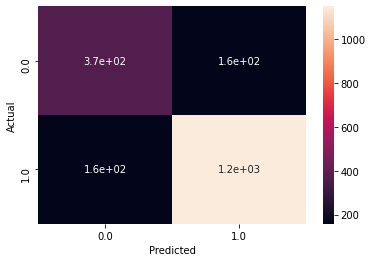

Linear SVM Report & Confusion Matrix
              precision    recall  f1-score   support

          HC       0.84      0.43      0.57       527
          MI       0.81      0.97      0.88      1311

    accuracy                           0.81      1838
   macro avg       0.83      0.70      0.73      1838
weighted avg       0.82      0.81      0.79      1838



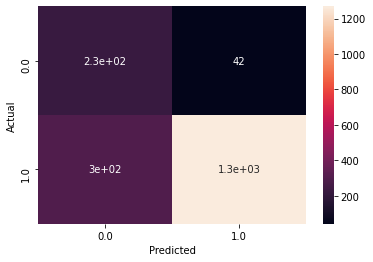

RBF SVM Report & Confusion Matrix
              precision    recall  f1-score   support

          HC       0.86      0.84      0.85       527
          MI       0.94      0.94      0.94      1311

    accuracy                           0.92      1838
   macro avg       0.90      0.89      0.90      1838
weighted avg       0.91      0.92      0.91      1838



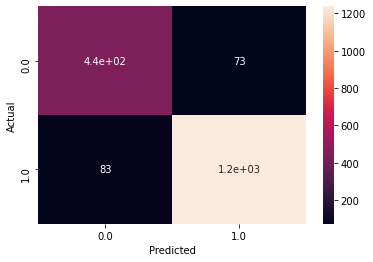

In [50]:
y_pred_KNN = neigh.predict(X_test)
y_pred_lsvc = svc_linear.predict(X_test)
y_pred_rsvc = svc_rbf.predict(X_test)


print("KNN Report & Confusion Matrix")
report_n_conf_mat(y_pred_KNN, y_test, file_name='KNN Classification Report.csv')


print("Linear SVM Report & Confusion Matrix")
report_n_conf_mat(y_pred_lsvc, y_test, file_name='Linear SVM Classification Report.csv')

print("RBF SVM Report & Confusion Matrix")
report_n_conf_mat(y_pred_rsvc, y_test, file_name='RBF SVM Classification Report.csv')
